In [1]:
from numpy import linspace,cos,pi,ceil,floor,arange
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample
import numpy as np

22050 [3 7 0 5 7] 3.0 7350.0
66150


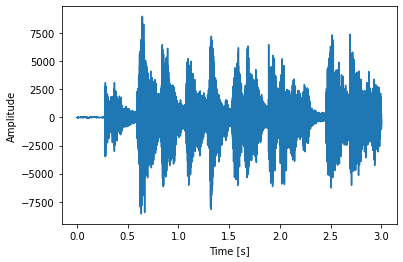

In [3]:
freq, sound = wavfile.read("cantina.wav")
sound = sound[:]
duration = len(sound)/freq
print(freq, sound[:5], duration, freq/duration)
print(len(sound))

time = np.arange(0,duration,1/freq)
plt.plot(time,sound)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


In [4]:
new_soundx = resample(sound, 15000)
wavfile.write("cantinax.wav", 5000, new_soundx)

11025


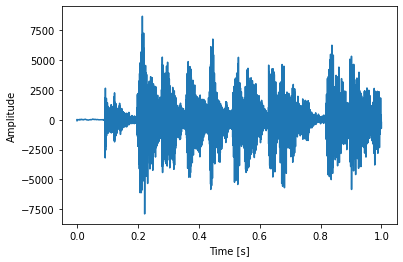

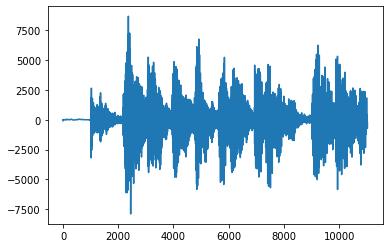

In [3]:
new_sound = resample(sound, int(freq/2))
duration = len(new_sound)/int(freq/2)
print(len(new_sound))
time = np.arange(0,duration,1/int(freq/2))
plt.plot(time,new_sound)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()



plt.plot(new_sound)


In [4]:
# Imports
from scipy.io import wavfile
import scipy.signal as sps


# Read file
sampling_rate, data = wavfile.read("cantina.wav")

# Your new sampling rate
new_rate = sampling_rate/2

# Resample data
number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
data2 = sps.resample(data, number_of_samples)
print(len(data), len(data2))
wavfile.write("test.wav", int(new_rate), data2)

wavfile.write("cantina2.wav", sampling_rate, data)
import os
print(os.path.getsize("cantina2.wav"))
print(os.path.getsize("test.wav"))

66150 33075
132344
264658


In [5]:
# Read file
sampling_rate, data = wavfile.read("cantina.wav")

# Your new sampling rate
new_rate = sampling_rate/2


data3 = sps.resample_poly(data, 100, 200)

print(len(data), len(data3))

wavfile.write("test2.wav", int(new_rate), data3)

66150 33075


In [6]:
from scipy.fft import fft, ifft
def fftplot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs (yf[:n//2]))
    plt.grid()
    plt.xlabel ("Frequency -->")
    plt.ylabel ("Magnitude")
    return plt.show()

In [7]:
freq, sound = wavfile.read("cantina.wav")

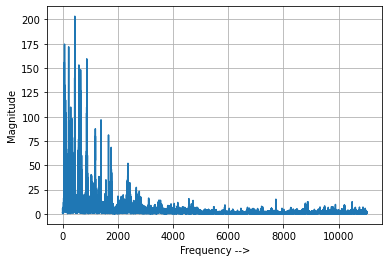

In [8]:
fftplot(sound, freq)

In [9]:
t = linspace(tmin, tmax, 400);
xa = cos(2*pi*t)+ cos(2*pi*f*t)
plt.plot(t, xa)

NameError: name 'tmin' is not defined

In [10]:
fftplot(xa, 40)

NameError: name 'xa' is not defined

In [12]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    print(type(freqs), type(max_freq))
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

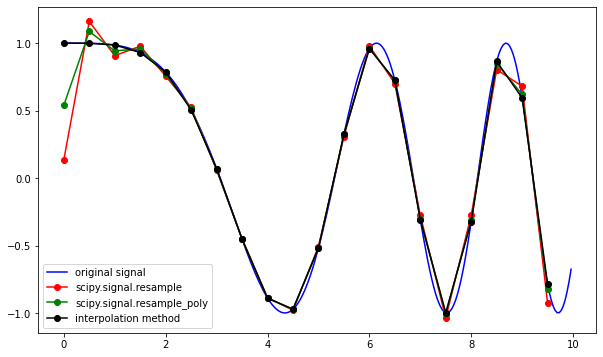

In [58]:
import scipy.signal 
def resample_by_interpolation(signal, input_fs, output_fs):
    scale = output_fs / input_fs
    n = round(len(signal) * scale)
    resampled_signal = np.interp(
        np.linspace(0.0, 1.0, n, endpoint=False),  # where to interpret
        np.linspace(0.0, 1.0, len(signal), endpoint=False),  # known positions
        signal,  # known data points
    )
    return resampled_signal

x = np.linspace(0, 10, 256, endpoint=False)
y = np.cos(-x**2/6.0)
yre = scipy.signal.resample(y,20)
xre = np.linspace(0, 10, len(yre), endpoint=False)

yre_polyphase = scipy.signal.resample_poly(y, 20, 256)
yre_interpolation = resample_by_interpolation(y, 256, 20)

plt.figure(figsize=(10, 6))
plt.plot(x,y,'b', xre,yre,'or-')
plt.plot(xre, yre_polyphase, 'og-')
plt.plot(xre, yre_interpolation, 'ok-')
plt.legend(['original signal', 'scipy.signal.resample', 'scipy.signal.resample_poly', 'interpolation method'], loc='lower left')
plt.show()

In [13]:
print(os.path.getsize("cantina2.wav"))
print(os.path.getsize("test.wav"))
print(os.path.getsize("test2.wav"))

132344
264658
264658


In [14]:
a = 100
b = 50
c = 5000
x = np.linspace(0, 10, a, endpoint=False)
y = data[c:c+a]
yre = scipy.signal.resample(y,b)
xre = np.linspace(0, 10, len(yre), endpoint=False)

yre_polyphase = scipy.signal.resample_poly(y, b, a)
yre_interpolation = resample_by_interpolation(y, a, b)

plt.figure(figsize=(10, 6))
plt.plot(x,y,'b', xre,yre,'or-')
plt.plot(xre, yre_polyphase, 'og-')
plt.plot(xre, yre_interpolation, 'ok-')
plt.legend(['original signal', 'scipy.signal.resample', 'scipy.signal.resample_poly', 'interpolation method'], loc='lower left')
plt.show()

NameError: name 'scipy' is not defined

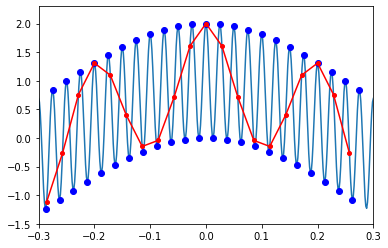

In [74]:
f = 40;  # Hz
tmin = -0.3;
tmax = 0.3;
t = linspace(tmin, tmax, 400);
x = cos(2*pi*t) + cos(2*pi*f*t); 
plt.plot(t, x)


T = 1/80.0;
nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);
x1 = cos(2*pi*n*T) + cos(2*pi*f*n*T);
plt.plot(n*T, x1, 'bo')


T = 1/35.0;
nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);
x2 = cos(2*pi*n*T) + cos(2*pi*f*n*T);
plt.plot(n*T, x2, '-r.',markersize=8)

plt.axis([-0.3, 0.3, -1.5, 2.3])
plt.show()